# Theory section
Plot Fig. 1 and produce a netcdf file for paraview to use to produce the example grid

In [1]:
import json
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import simplesimdb as simplesim

import pandas as pd
plt.rcParams.update({'font.size': 22})
pd.set_option('display.float_format', lambda x: '%.2e' % x)
FELTOR_PATH="../feltor" # path to the feltor library

In [2]:
# Create an inputfile for the geometry_diag.cu program to plot an example grid and the delta function
def create_geometry_input() :
    with open ("compass_2X.json",'r') as f:
        params = json.load(f)
    geometry_diag_json = {
    "grid":
    {
        "n" : 3,
        "Nx" : 80,
        "Ny" : 80,
        "Nz" : 20,
        "Npsi": 32,
        "Neta": 640,
        "scaleR" : [1.4, 1.3],
        "scaleZ" : [2, 2]
    },
    "boundary":
    {
        "wall":
        {
            "type" : "heaviside",
            "boundary" : 1.1,
            "alpha" : 0.2
        },
        "sheath":
        {
            "boundary" : 0.0625,
            "alpha" : 0.015625,
            "max_angle": 1e-3
        }
    },
    "magnetic_field":
    {
        "input" : "params",
        "params": params
    },
    "width-factor" : 0.2
    }
    return geometry_diag_json

In [3]:
geometry_sim = simplesim.Manager( executable=FELTOR_PATH+"/inc/geometries/geometry_diag",
                              directory="Averages/geometry", filetype="nc")
#geometry_sim.delete_all()

Existing simulation 81d0bf...c138a6.nc


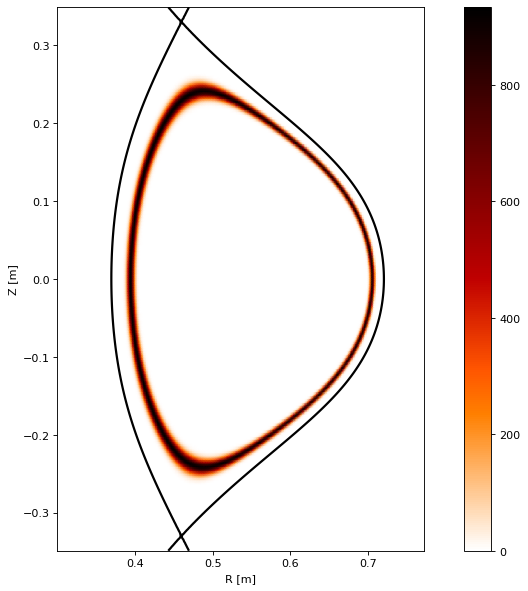

In [4]:
simfile = geometry_sim.create( create_geometry_input())
ncin = Dataset( simfile, 'r', format="NETCDF4")
frows = 1
fcols = 1
x = ncin["x"][:]
y = ncin["y"][:]
xc = np.kron( np.ones(np.shape(y)),x).reshape( (np.size(y), np.size(x)))
yc = np.kron( y, np.ones(np.shape(x))).reshape( (np.size(y), np.size(x)))
fig,ax=plt.subplots(frows,fcols,figsize=(fcols*8,frows*9),dpi= 80, facecolor='w', edgecolor='k')
name = "Delta"
im = ax.pcolormesh(xc, yc, ncin[name][:,:],
                   cmap="gist_heat_r", shading="gouraud") 
fig.colorbar(im, ax=ax)
im = ax.contour( xc, yc, ncin["Rho_p"][:,:], levels=[1], linewidths=2,colors='k')

ax.axis("scaled")
ax.set_xlabel( "R [m]")
ax.set_ylabel( "Z [m]")
plt.savefig( "delta_function.png")
plt.show()

In [5]:
 # Now create a file that can be used by paraview to plot the example grid
geometry_input = create_geometry_input()
geometry_input["grid"]["n"] = 1
geometry_input["grid"]["Npsi"] = 5
geometry_input["grid"]["Neta"] = 40
simfile = geometry_sim.create( geometry_input)
print ( simfile)

Existing simulation c47ac8...c8e258.nc
Averages/geometry/c47ac8a18e6bec4e97b88d3d4358749ccec8e258.nc
